# Coronavirus (COVID-19) Infection Survey: England

https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/datasets/coronaviruscovid19infectionsurveydata


In [1]:
library(tidyverse)
library(readxl)

download.file("https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/datasets/coronaviruscovid19infectionsurveydata/2023/20230310covid19infectionsurveydatasetsengland.xlsx",
             destfile = "data/infectionsurveydatasetsengland.xlsx")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [29]:
df <- read_excel("data/infectionsurveydatasetsengland.xlsx", sheet = "1a", range="A5:B190") %>%
  na.omit%>%
  separate(`Time period`, into = c("From", "To"), sep = " to ")%>%
  mutate(`From` = as.Date(`From`, format = "%d %B %Y"))%>%
  mutate(`To` = as.Date(`To`, format = "%d %B %Y"))%>%
  mutate(midpoint_date = From + ((To - From) / 2))%>%
  rename(est_positive = `Estimated average % of the population testing positive for COVID-19`)%>%
  select(-From, -To)

df%>%
  write_csv("data/ons_estimated_positive.csv")

df%>%head

est_positive,midpoint_date
<dbl>,<date>
0.27,2020-05-03
0.25,2020-05-10
0.24,2020-05-17
0.10,2020-05-23
0.06,2020-05-31
0.06,2020-06-06


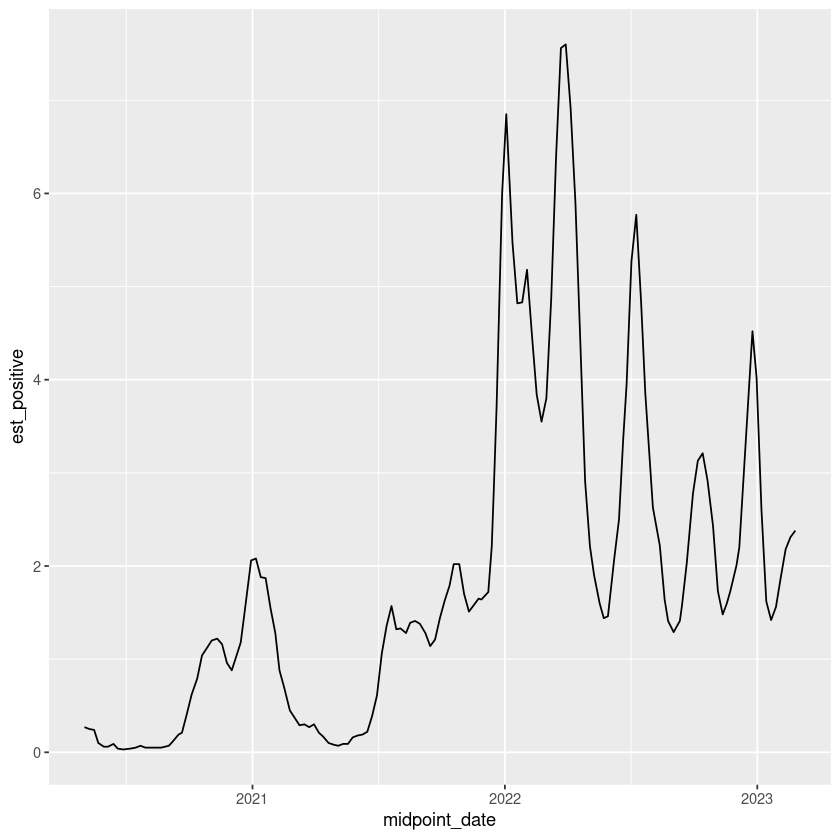

In [28]:
df%>%
  ggplot(aes(x = midpoint_date, y = est_positive)) +
  geom_line()